# **Setup Pyspark**

In [2]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 199 kB 57.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=f36f9666be3adcf88bd776007be2a211e84f3d07ab977611ecad28bf8233823e
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

      

In [4]:
spark

In [5]:
#import necessary files from pc
from google.colab import files

uploaded = files.upload()

Saving AppleStore.csv to AppleStore.csv


In [6]:
#read csv file POI.csv
#df_Apple = spark.read.csv("AppleStore.csv", header=True, inferSchema=True)

from pyspark.sql.types import *
# create defined schema with struct types function
schema = StructType([
  StructField("x", IntegerType(), True),
  StructField("ID", IntegerType(), True),
  StructField("AppName", StringType(), True),
  StructField("SizeBytes", LongType(), True),
  StructField("Currency", StringType(), True),
  StructField("Price", DoubleType(), True),
  StructField("TotalRatingCount", IntegerType(), True),
  StructField("VersionRatingCount", IntegerType(), True),
  StructField("UserRating", DoubleType(), True),
  StructField("VersionUserRating", DoubleType(), True),
  StructField("Version", StringType(), True),
  StructField("AgeRating", StringType(), True),
  StructField("Genre", StringType(), True),
  StructField("SupportingDevices", IntegerType(), True),
  StructField("ScreenshotsDisplayed", IntegerType(), True),
  StructField("LanguagesSupported", IntegerType(), True),
  StructField("VPPLicensed", IntegerType(), True)
])


# read parquet file with defined schema       
df_Apple = spark.read.format("csv") \
      .option("header", True) \
      .schema(schema) \
      .load("AppleStore.csv")

In [7]:
#print data frame schema
df_Apple.printSchema()

root
 |-- x: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- AppName: string (nullable = true)
 |-- SizeBytes: long (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- TotalRatingCount: integer (nullable = true)
 |-- VersionRatingCount: integer (nullable = true)
 |-- UserRating: double (nullable = true)
 |-- VersionUserRating: double (nullable = true)
 |-- Version: string (nullable = true)
 |-- AgeRating: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- SupportingDevices: integer (nullable = true)
 |-- ScreenshotsDisplayed: integer (nullable = true)
 |-- LanguagesSupported: integer (nullable = true)
 |-- VPPLicensed: integer (nullable = true)



In [8]:
df_Apple.show()

+---+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+
|  x|       ID|             AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|            Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicensed|
+---+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+
|  1|281656475|     PAC-MAN Premium|100788224|     USD| 3.99|           21292|                26|       4.0|              4.5|  6.3.5|       4+|            Games|               38|                   5|                10|          1|
|  2|281796108|Evernote - stay o...|158578688|     USD|  0.0|       

In [9]:
df_Apple = df_Apple.drop("x")

In [10]:
df_Apple.show()

+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+
|       ID|             AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|            Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicensed|
+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+
|281656475|     PAC-MAN Premium|100788224|     USD| 3.99|           21292|                26|       4.0|              4.5|  6.3.5|       4+|            Games|               38|                   5|                10|          1|
|281796108|Evernote - stay o...|158578688|     USD|  0.0|          161065|          

In [11]:
df_Apple.createOrReplaceTempView("Apple")

In [47]:
from pyspark.sql.functions import col, when, count

# check whether there are any null columns in our dataframe
df_AppleNull = df_Apple.select( [count( when( col(column).isNull(), column) ).alias(column) for column in df_Apple.columns] )
df_AppleNull.show()

+---+-------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----+-----------------+--------------------+------------------+-----------+
| ID|AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicensed|
+---+-------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----+-----------------+--------------------+------------------+-----------+
|  0|      0|        0|       0|    0|               0|                 0|         0|                0|      0|        0|    0|                0|                   0|                 0|          0|
+---+-------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----+-----------------+--------------------+------------------+-----------+



In [40]:
# use spark sql feature 
df_AppleStore = spark.sql("SELECT *, CASE VPPLicensed WHEN 1 THEN True ELSE False END as VPPLicense, CASE WHEN Price = 0.00 THEN True ELSE False END as Free FROM Apple")
df_AppleStore.show()
df_AppleStore.printSchema()

+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+----------+-----+
|       ID|             AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|            Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicensed|VPPLicense| Free|
+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+-----------+----------+-----+
|281656475|     PAC-MAN Premium|100788224|     USD| 3.99|           21292|                26|       4.0|              4.5|  6.3.5|       4+|            Games|               38|                   5|                10|          1|      true|false|
|281796108|Evern

In [13]:
df_AppleStore = df_AppleStore.drop("VPPLicensed")
df_AppleStore.show()
df_AppleStore.printSchema()

+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+----------+-----+
|       ID|             AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|            Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicense| Free|
+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+----------+-----+
|281656475|     PAC-MAN Premium|100788224|     USD| 3.99|           21292|                26|       4.0|              4.5|  6.3.5|       4+|            Games|               38|                   5|                10|      true|false|
|281796108|Evernote - stay o...|158578688|     USD|  0.0|       

In [14]:
df_AppleStore.createOrReplaceTempView("AppleStores")

+-----------------+-----+--------+
|            Genre| Free|NoOfApps|
+-----------------+-----+--------+
|            Games| true|    2257|
|            Games|false|    1605|
|    Entertainment| true|     334|
|        Education|false|     321|
|    Entertainment|false|     201|
|    Photo & Video|false|     182|
|    Photo & Video| true|     167|
|Social Networking| true|     143|
|        Utilities|false|     139|
|        Education| true|     132|
|         Shopping| true|     121|
|     Productivity|false|     116|
|        Utilities| true|     109|
| Health & Fitness|false|     104|
|        Lifestyle| true|      94|
|          Finance| true|      84|
|           Sports| true|      79|
| Health & Fitness| true|      76|
|            Music|false|      71|
|            Music| true|      67|
+-----------------+-----+--------+
only showing top 20 rows



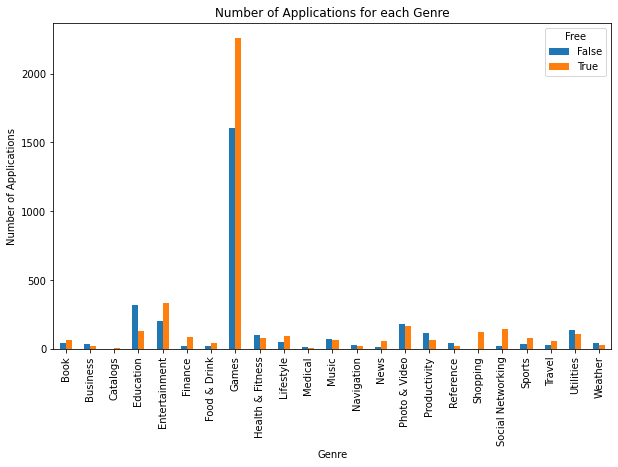

In [39]:
# use spark sql feature 
# import pandas library and matplot library
import pyspark.pandas as ps
import matplotlib.pyplot as plt

# write new sql query
df_AppleStores1 = spark.sql("SELECT Genre,Free,Count(ID) as NoOfApps FROM AppleStores GROUP BY Genre,Free ORDER BY Count(ID) DESC")
df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF = df_AppleStores1.toPandas()

# pivot the data frame into the way to be used for the chart
psDF = psDF.pivot(index='Genre', columns='Free', values='NoOfApps')

# plot the chart with main title
psDF.plot(figsize=(10, 6), kind="bar", title="Number of Applications for each Genre")

# add the axis titles
plt.xlabel('Genre')
plt.ylabel('Number of Applications')

# display chart
plt.show()

+----------------+-----+------------------+
|           Genre| Free|        UserRating|
+----------------+-----+------------------+
|        Catalogs|false|               4.5|
|        Shopping|false|               4.5|
|    Productivity|false| 4.030172413793103|
|           Music|false| 4.014084507042254|
|    Productivity| true|3.9596774193548385|
|           Music| true|3.9402985074626864|
|           Games|false|3.9049844236760123|
|        Business|false|3.8783783783783785|
|         Weather|false|3.8536585365853657|
|   Photo & Video|false|3.8076923076923075|
|   Photo & Video| true|3.7934131736526946|
|Health & Fitness|false|3.7884615384615383|
|            Book|false| 3.739130434782609|
|         Medical|false|3.6333333333333333|
|Health & Fitness| true|3.5789473684210527|
|        Shopping| true|3.5330578512396693|
|           Games| true|3.5285777580859548|
|       Reference|false| 3.522727272727273|
|        Business| true|               3.5|
|    Food & Drink|false|        

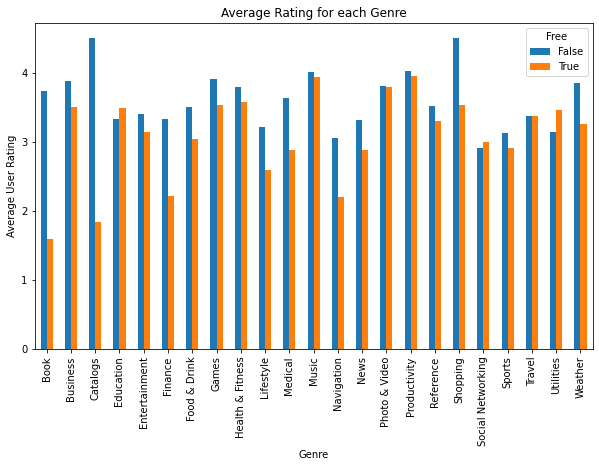

In [17]:
# use spark sql feature 

# write new sql query
df_AppleStores1 = spark.sql("SELECT Genre,Free, AVG(UserRating) as UserRating FROM AppleStores GROUP BY Genre,Free ORDER BY UserRating DESC")
df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF1 = df_AppleStores1.toPandas()

# pivot the data frame into the way to be used for the chart
psDF1 = psDF1.pivot(index='Genre', columns='Free', values='UserRating')

# plot the chart with main title
psDF1.plot(figsize=(10, 6), kind="bar", title="Average Rating for each Genre",)

# add the axis titles
plt.xlabel('Genre')
plt.ylabel('Average User Rating')

# display chart
plt.show()

+----------+--------+
|UserRating|NoOfApps|
+----------+--------+
|       4.5|    2663|
|       4.0|    1626|
|       0.0|     929|
|       3.5|     702|
|       5.0|     492|
|       3.0|     383|
|       2.5|     196|
|       2.0|     106|
|       1.5|      56|
|       1.0|      44|
+----------+--------+



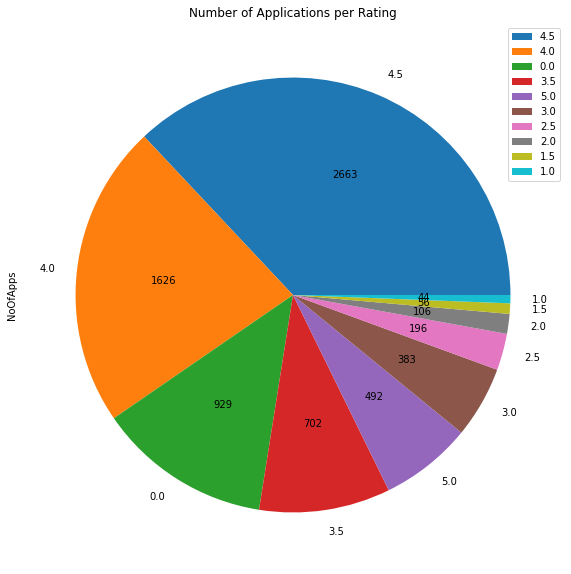

In [18]:
# use spark sql feature

# write new sql query
df_AppleStores2 = spark.sql("SELECT UserRating,Count(ID) as NoOfApps FROM AppleStores GROUP BY UserRating ORDER BY Count(ID) DESC")
df_AppleStores2.show()

# convert data frame into a pandas data frame
psDF2 = df_AppleStores2.toPandas()

def make_values(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

# plot the chart with main title
psDF2.plot(figsize=(10, 10), kind="pie", title="Number of Applications per Rating", y="NoOfApps", labels=psDF2["UserRating"], autopct=make_values(psDF2["NoOfApps"]))

# add the axis titles
plt.legend( loc='upper right')

# display chart
plt.show()

+---------+--------+
|AgeRating|NoOfApps|
+---------+--------+
|       4+|    4433|
|      12+|    1155|
|       9+|     987|
|      17+|     622|
+---------+--------+



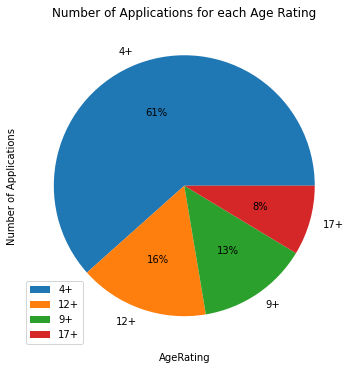

In [32]:
# use spark sql feature 

# write new sql query
df_AppleStores3 = spark.sql("SELECT AgeRating,Count(ID) as NoOfApps FROM AppleStores GROUP BY AgeRating ORDER BY Count(ID) DESC")
df_AppleStores3.show()

# convert data frame into a pandas data frame
psDF3 = df_AppleStores3.toPandas()
#display(psDF3)

# plot the chart with main title
psDF3.plot(figsize=(10, 6), kind="pie", title="Number of Applications for each Age Rating",y="NoOfApps", labels=psDF3["AgeRating"], autopct="%1.1d%%")

# add the axis titles
plt.xlabel('AgeRating')
plt.ylabel('Number of Applications')

# display chart
plt.show()

In [20]:
import pyspark.sql.functions as F

def rated(rating, version_rating):
  if version_rating > rating:
    return "Improved"
  elif version_rating == rating:
    return "Same"
  else :
    return "Decreased"

udf_rated = F.udf(rated)

newDF = spark.sql("SELECT * FROM AppleStores")

RatingChangeDF = (newDF.withColumn("RatingChange", udf_rated(newDF.UserRating, newDF.VersionUserRating)))
RatingChangeDF.show()


+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+----------+-----+------------+
|       ID|             AppName|SizeBytes|Currency|Price|TotalRatingCount|VersionRatingCount|UserRating|VersionUserRating|Version|AgeRating|            Genre|SupportingDevices|ScreenshotsDisplayed|LanguagesSupported|VPPLicense| Free|RatingChange|
+---------+--------------------+---------+--------+-----+----------------+------------------+----------+-----------------+-------+---------+-----------------+-----------------+--------------------+------------------+----------+-----+------------+
|281656475|     PAC-MAN Premium|100788224|     USD| 3.99|           21292|                26|       4.0|              4.5|  6.3.5|       4+|            Games|               38|                   5|                10|      true|false|    Improved|
|281796108|E

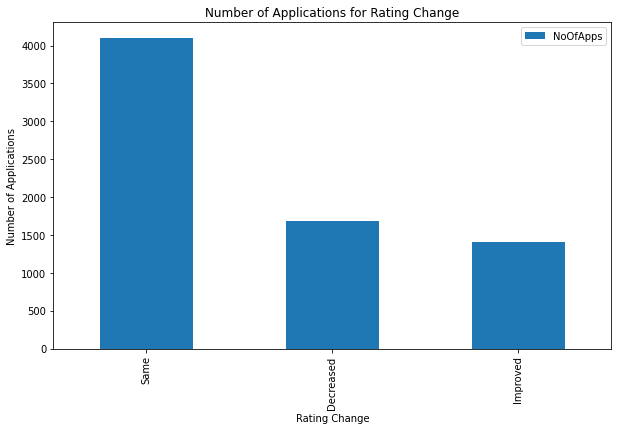

In [21]:
RatingChangeDF.createOrReplaceTempView("RatingChangeDF")

# use spark sql feature 

# write new sql query
df_RatingChange = spark.sql("SELECT RatingChange,Count(ID) as NoOfApps FROM RatingChangeDF GROUP BY RatingChange ORDER BY Count(ID) DESC")
#df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF4 = df_RatingChange .toPandas()

# plot the chart with main title
psDF4.plot(figsize=(10, 6), kind="bar", title="Number of Applications for Rating Change", x="RatingChange")

# add the axis titles
plt.xlabel('Rating Change')
plt.ylabel('Number of Applications')

# display chart
plt.show()


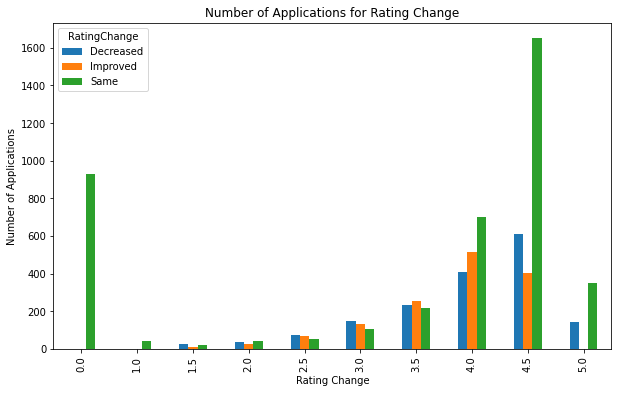

In [22]:

# use spark sql feature 

# write new sql query
df_RatingChange2 = spark.sql("SELECT RatingChange,UserRating,Count(ID) as NoOfApps FROM RatingChangeDF GROUP BY RatingChange,UserRating ORDER BY Count(ID) DESC")
#df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF5 = df_RatingChange2.toPandas()

# pivot the data frame into the way to be used for the chart
psDF5 = psDF5.pivot(index='UserRating', columns='RatingChange', values='NoOfApps')

# plot the chart with main title
psDF5.plot(figsize=(10, 6), kind="bar", title="Number of Applications for Rating Change")

# add the axis titles
plt.xlabel('Rating Change')
plt.ylabel('Number of Applications')

# display chart
plt.show()


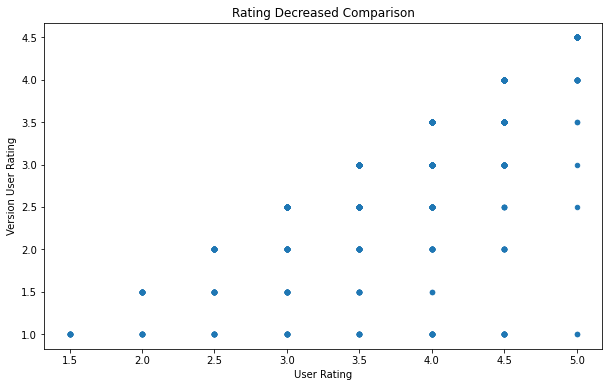

In [23]:

# use spark sql feature 

# write new sql query
df_RatingChange3 = spark.sql("SELECT UserRating,VersionUserRating FROM RatingChangeDF WHERE RatingChange = 'Decreased' and VersionRatingCount > 0")
#df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF6 = df_RatingChange3.toPandas()

# plot the chart with main title
psDF6.plot(figsize=(10, 6), kind="scatter", title="Rating Decreased Comparison", x="UserRating", y="VersionUserRating")

# add the axis titles
plt.xlabel('User Rating')
plt.ylabel('Version User Rating')

# display chart
plt.show()

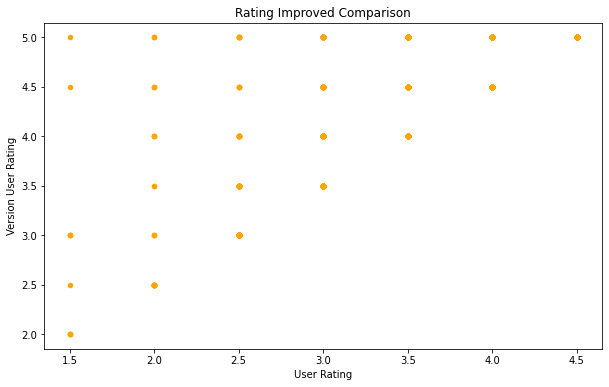

In [24]:
# use spark sql feature 

# write new sql query
df_RatingChange4 = spark.sql("SELECT UserRating,VersionUserRating FROM RatingChangeDF WHERE RatingChange = 'Improved' and VersionRatingCount > 0")
#df_AppleStores1.show()

# convert data frame into a pandas data frame
psDF7 = df_RatingChange4.toPandas()

# plot the chart with main title
psDF7.plot(figsize=(10, 6), kind="scatter", title="Rating Improved Comparison", x="UserRating", y="VersionUserRating", c="orange")

# add the axis titles
plt.xlabel('User Rating')
plt.ylabel('Version User Rating')

# display chart
plt.show()

,Genre,AppName,TotalRatingCount
0,Navigation,parkOmator – for Apple Watch meter expiration ...,1
1,Social Networking,CTFxCmoji,39
2,Travel,机票、火车票、汽车票预定助手 for 铁路12306,128
3,Music,Patterning : Drum Machine,306
4,Medical,Blink Health,1198
5,Book,快看漫画,1647
6,Weather,Deluxe Moon Pro - Moon Phases Calendar,3312
7,Sports,J23 - Jordan Release Dates and History,3775
8,Entertainment,Atom – Movie Tickets and Showtimes,4105
9,Productivity,Productive habits & daily goals tracker,4736


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36710 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27773 missing from current font.
  font.set_

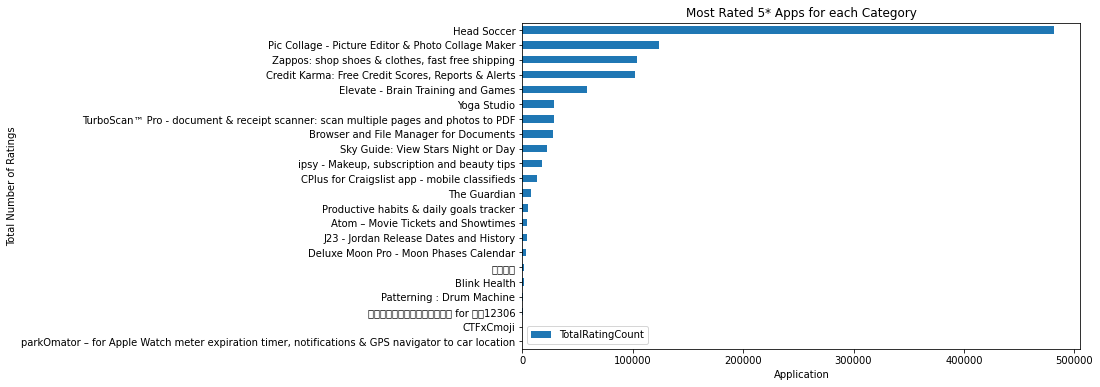

In [34]:
# use spark sql feature 

# write new sql query
df_RatingChange5 = spark.sql("SELECT R.Genre,AppName,R.TotalRatingCount FROM RatingChangeDF R INNER JOIN (SELECT Genre, Max(TotalRatingCount) as TotalRatingCount FROM RatingChangeDF WHERE RatingChange != 'Decreased' and VersionRatingCount > 0 and UserRating = 5 GROUP BY Genre) as NT ON NT.Genre=R.Genre and NT.TotalRatingCount=R.TotalRatingCount order by R.TotalRatingCount")
#df_RatingChange5.show(50)

# convert data frame into a pandas data frame
psDF8 = df_RatingChange5.toPandas()
display(psDF8)

# plot the chart with main title
psDF8.plot(figsize=(10, 6), kind="barh", title="Most Rated 5* Apps for each Category", x="AppName")

# add the axis titles
plt.xlabel('Application')
plt.ylabel('Total Number of Ratings')

# display chart
plt.show()